<b>environment:</b> ds_env, python=3.11.11

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
from pathlib import Path
import matplotlib.ticker as mticker

import scanpy as sc
import pandas as pd
import numpy as np

from cell_type_proportions import run_cell_prop
from filter_adata import adata_filtered, adata_hightumour, adata_peritumour 

adata and clinical merged, rename the columns if you want
clusters are now annotated with specific and broad cell types


/Users/nabilazulkapeli/Documents/Honours Thesis 2025/nabs_data/final_files/filter_adata.py:195: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('core_id')
/Users/nabilazulkapeli/Documents/Honours Thesis 2025/nabs_data/final_files/filter_adata.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('core_id')


low quality cores with <1000 total cells or <100 melanoma cells have been removed
adata_filtered (both high tumour and peritumour cores) has been created
adata_hightumour (only high tumour cores) has been created
adata_peritumour (only peritumour cores) has been created
ready for downstream analysis, you can choose adata_filtered for global analysis and adata_peritumour/adata_hightumour for region-specific analyses


In [16]:
# relabelling
# broad renamed labels
broad_dict = {
    "CD8 T": "T cell",
    "CD4 T": "T cell",
    "Plasma B": "B cell",
    "Plasmablast": "B cell",
    "TLS": "TLS",
    "Dendritic": "Dendritic",
    "Granulocyte": "Granulocyte",
    "M1 TAM": "TAM",
    "M2 TAM": "TAM",
    "Ig-expressing TAM": "TAM",
    "Inflammatory CAF": "CAF",
    "Classical CAF": "CAF",
    "Endothelial": "Endothelial",
    "Epithelial": "Epithelial",
    "Proliferating Melanoma": "Tumour",
    "Mast": "Mast"
}
# simplest renamed labels
simple_dict = {
    "CD8 T": "Immune",
    "CD4 T": "Immune",
    "Plasma": "Immune",
    "Plasmablast": "Immune",
    "TLS": "Immune",
    "Dendritic": "Immune",
    "Granulocyte": "Immune",
    "M1 TAM": "Immune",
    "M2 TAM": "Immune",
    "Ig-TAM": "Immune",
    "iCAF": "Stromal",
    "cCAF": "Stromal",
    "Endothelial": "Stromal",
    "Epithelial": "Stromal",
    "Melanoma": "Tumour",
    "Mast": "Immune"
}
simple_color = {
    # tumour
    "Tumour": "#db5656",
    # stromal
    "Stromal": "#F3F2EC",
    # immune
    "Immune": "#1E93AB",
}
tab20_simple_color = {
    # tumour
    "Tumour": "#b0b0b0",
    # stromal
    "Stromal": "#b05a93",
    # immune
    "Immune": "#5078a3",
}
# tumour at base, stromal in middle, immune on top
simple_order = [
    "Tumour",        # bottom
    "Stromal",
    "Immune"
]

broad_colors = {
    # immune
    "T cell": "#A2AADB",      # blue
    #"CD4 T": "#CBDCEB",
    "B cell": "#9B7EBD",   # green
    #"Plasmablast": "#D9E9CF",
    "TLS": "#b3e0f2",           # teal
    "Dendritic": "#86a8c5", 
    "Granulocyte": "#6b8ca3",
    #"M1 TAM": "#7F55B1",    # purple
    "TAM": "#a1c6d9",    
    "Mast": "#4f6e85",      
    # stromal
    "CAF": "#FFFDEA",
    #"Ig-expressing TAM": "TAM",
    #"Inflammatory CAF": "CAF",
    #"Classical CAF": "CAF",
    "Endothelial": "#DCCEAC",
    "Epithelial": "#EEE7CA",
    # tumour
    "Tumour": "#cb7272",
}
specific_colors = {
    "Proliferating Melanoma": "#b0b0b0",
    "Endothelial": "#7C3C67",
    "Epithelial": "#AF5A93",
    "Classical CAF": "#BD75A5",
    "Inflammatory CAF": "#CA91B7",
    "Mast": "#4B3D80",
    "Granulocyte": "#67589B",
    "Dendritic": "#264566",
    "M1 TAM": "#496F97",
    "M2 TAM": "#5B83AE",
    "Ig-expressing TAM": "#7697BC",
    "Plasmablast": "#3E7682",
    "Plasma B": "#4D99A8",
    "TLS": "#65AAB8",
    "CD4 T": "#81BAC5",
    "CD8 T": "#ABD1D8"
}

broad_order = [
    "Tumour",
    "Endothelial",
    "Epithelial",
    "CAF",
    "Mast",
    "Granulocyte",
    "Dendritic",
    "TAM",
    "TLS",
    "B cell",
    "T cell"
]
specific_order = [
    "Proliferating Melanoma",
    "Endothelial",
    "Epithelial",
    "Classical CAF",
    "Inflammatory CAF",
    "Mast",
    "Granulocyte",
    "Dendritic",
    "M1 TAM",
    "M2 TAM",
    "Ig-expressing TAM",
    "Plasmablast",
    "Plasma B",
    "TLS",
    "CD4 T",
    "CD8 T"
]

new_labels_order = [
    "Melanoma",
    "Endothelial",
    "Epithelial",
    "cCAF",
    "iCAF",
    "Mast",
    "Granulocyte",
    "Dendritic",
    "M1 TAM",
    "M2 TAM",
    "Ig-TAM",
    "Plasmablast",
    "Plasma",
    "TLS",
    "CD4 T",
    "CD8 T"
]
new_labels_colors = {
    "Melanoma": "#b0b0b0",
    "Endothelial": "#7C3C67",
    "Epithelial": "#AF5A93",
    "cCAF": "#BD75A5",
    "iCAF": "#CA91B7",
    "Mast": "#4B3D80",
    "Granulocyte": "#67589B",
    "Dendritic": "#264566",
    "M1 TAM": "#496F97",
    "M2 TAM": "#5B83AE",
    "Ig-TAM": "#7697BC",
    "Plasmablast": "#3E7682",
    "Plasma": "#4D99A8",
    "TLS": "#65AAB8",
    "CD4 T": "#81BAC5",
    "CD8 T": "#ABD1D8"
}
new_labels_map = {
    "Proliferating Melanoma": "Melanoma",
    "Endothelial": "Endothelial",
    "Epithelial": "Epithelial",
    "Classical CAF": "cCAF",
    "Inflammatory CAF": "iCAF",
    "Mast": "Mast",
    "Granulocyte":"Granulocyte",
    "Dendritic":"Dendritic",
    "M1 TAM":"M1 TAM",
    "M2 TAM":"M2 TAM",
    "Ig-expressing TAM": "Ig-TAM",
    "Plasmablast":"Plasmablast",
    "Plasma B":"Plasma",
    "TLS":"TLS",
    "CD4 T":"CD4 T",
    "CD8 T":"CD8 T"
}

response_palette = {"Responder": "#66c2a5", "Non-Responder": "#fc8d62"}

<h1><b>Global Analysis

In [14]:
# run cell type proportions
results_df, tidy_df, proportions, meta, response_col, groupby, region_col = run_cell_prop(adata_filtered, celltype_col='specific_cell_types')

/Users/nabilazulkapeli/Documents/Honours Thesis 2025/nabs_data/final_files/cell_type_proportions.py:51: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[celltype_col] = adata.obs[celltype_col].map(new_labels_map)
/Users/nabilazulkapeli/Documents/Honours Thesis 2025/nabs_data/final_files/cell_type_proportions.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby([groupby, celltype_col])
/opt/anaconda3/envs/ds_env/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/anaconda3/envs/ds_env/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarn

/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46233/180699320.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(response_col)
/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46233/180699320.py:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  composition_grouped = composition.groupby(simple_dict, axis=1).sum()


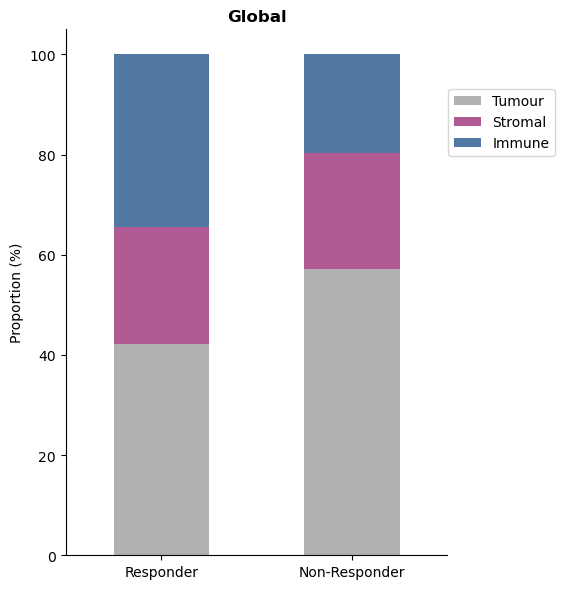

In [17]:
# compute mean composition for responders and non-responders
composition = (
    proportions.join(meta[response_col])
    .groupby(response_col)
    .mean()
)
# rename and reorder categorical labels
composition = composition.reset_index()
composition['Response'] = composition['Response'].replace({'Non-responder': 'Non-Responder'})
composition = composition.set_index('Response')
composition = composition.reindex(['Responder', 'Non-Responder'])

# normalize so each bar adds up to 100%
composition = composition.div(composition.sum(axis=1), axis=0) * 100  # ensure percentages

# collapse columns by group
composition_grouped = composition.groupby(simple_dict, axis=1).sum()

# normalize again to percentages (safeguard)
composition_grouped = composition_grouped.div(composition_grouped.sum(axis=1), axis=0) * 100

# reorder dataframe columns
composition_grouped = composition_grouped[simple_order]

# stacked bar plot
composition_grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(6,6),
    color=[tab20_simple_color[c] for c in composition_grouped.columns],
    width=0.5,
    grid=False
)

plt.ylabel("Proportion (%)")
plt.xlabel("")
plt.title("Global", weight='bold')
plt.tick_params(axis='x', labelrotation=0)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, .9))
sns.despine()
plt.tight_layout()
plt.show()

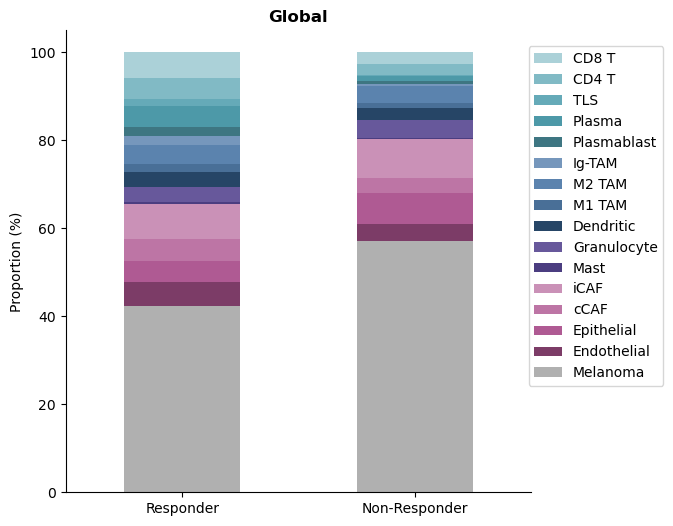

In [21]:
composition = composition[new_labels_order]
ax = composition.plot(
    kind='bar',
    stacked=True,
    color=[new_labels_colors[c] for c in composition.columns],
    width=0.5,
    grid=False,
    figsize=(6,6),
)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, new_labels, loc='upper right', bbox_to_anchor=(1.3, .98), reverse=True)
plt.ylabel("Proportion (%)")
plt.xlabel("")
plt.title("Global", weight='bold')
plt.tick_params(axis='x', labelrotation=0)
sns.despine()

/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46233/1067568138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_effect['beta_pct'] = response_effect['beta_prop'] * 100
/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46233/1067568138.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_effect['ci_low_pct'] = response_effect['ci_low_prop'] * 100
/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46233/1067568138.py:5: SettingWithCopyWarning: 
A value is tryi

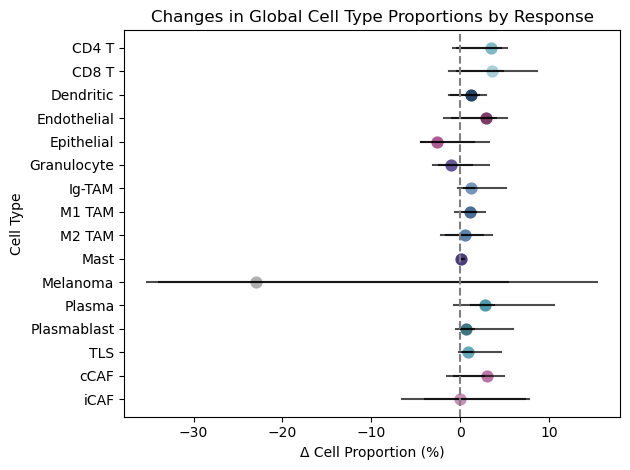

In [22]:
# forest plot
response_effect = tidy_df[tidy_df['term'].str.contains(response_col)]
response_effect['beta_pct'] = response_effect['beta_prop'] * 100
response_effect['ci_low_pct'] = response_effect['ci_low_prop'] * 100
response_effect['ci_high_pct'] = response_effect['ci_high_prop'] * 100

plt.Figure(figsize=(6,6))
ax = sns.pointplot(
    data=response_effect,
    y='cell_type',
    x='beta_pct',
    join=False,
    capsize=0.2,
    errorbar=None,
    palette=new_labels_colors
)
for i, row in response_effect.iterrows():
    plt.plot([row['ci_low_pct'], row['ci_high_pct']], [row['cell_type']]*2, 'k-', alpha=0.7)

plt.axvline(0, ls='--', c='gray')
plt.ylabel('Cell Type')
plt.xlabel('Δ Cell Proportion (%)')
plt.title('Changes in Global Cell Type Proportions by Response')
plt.tight_layout()
plt.show()

/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46233/2670871168.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


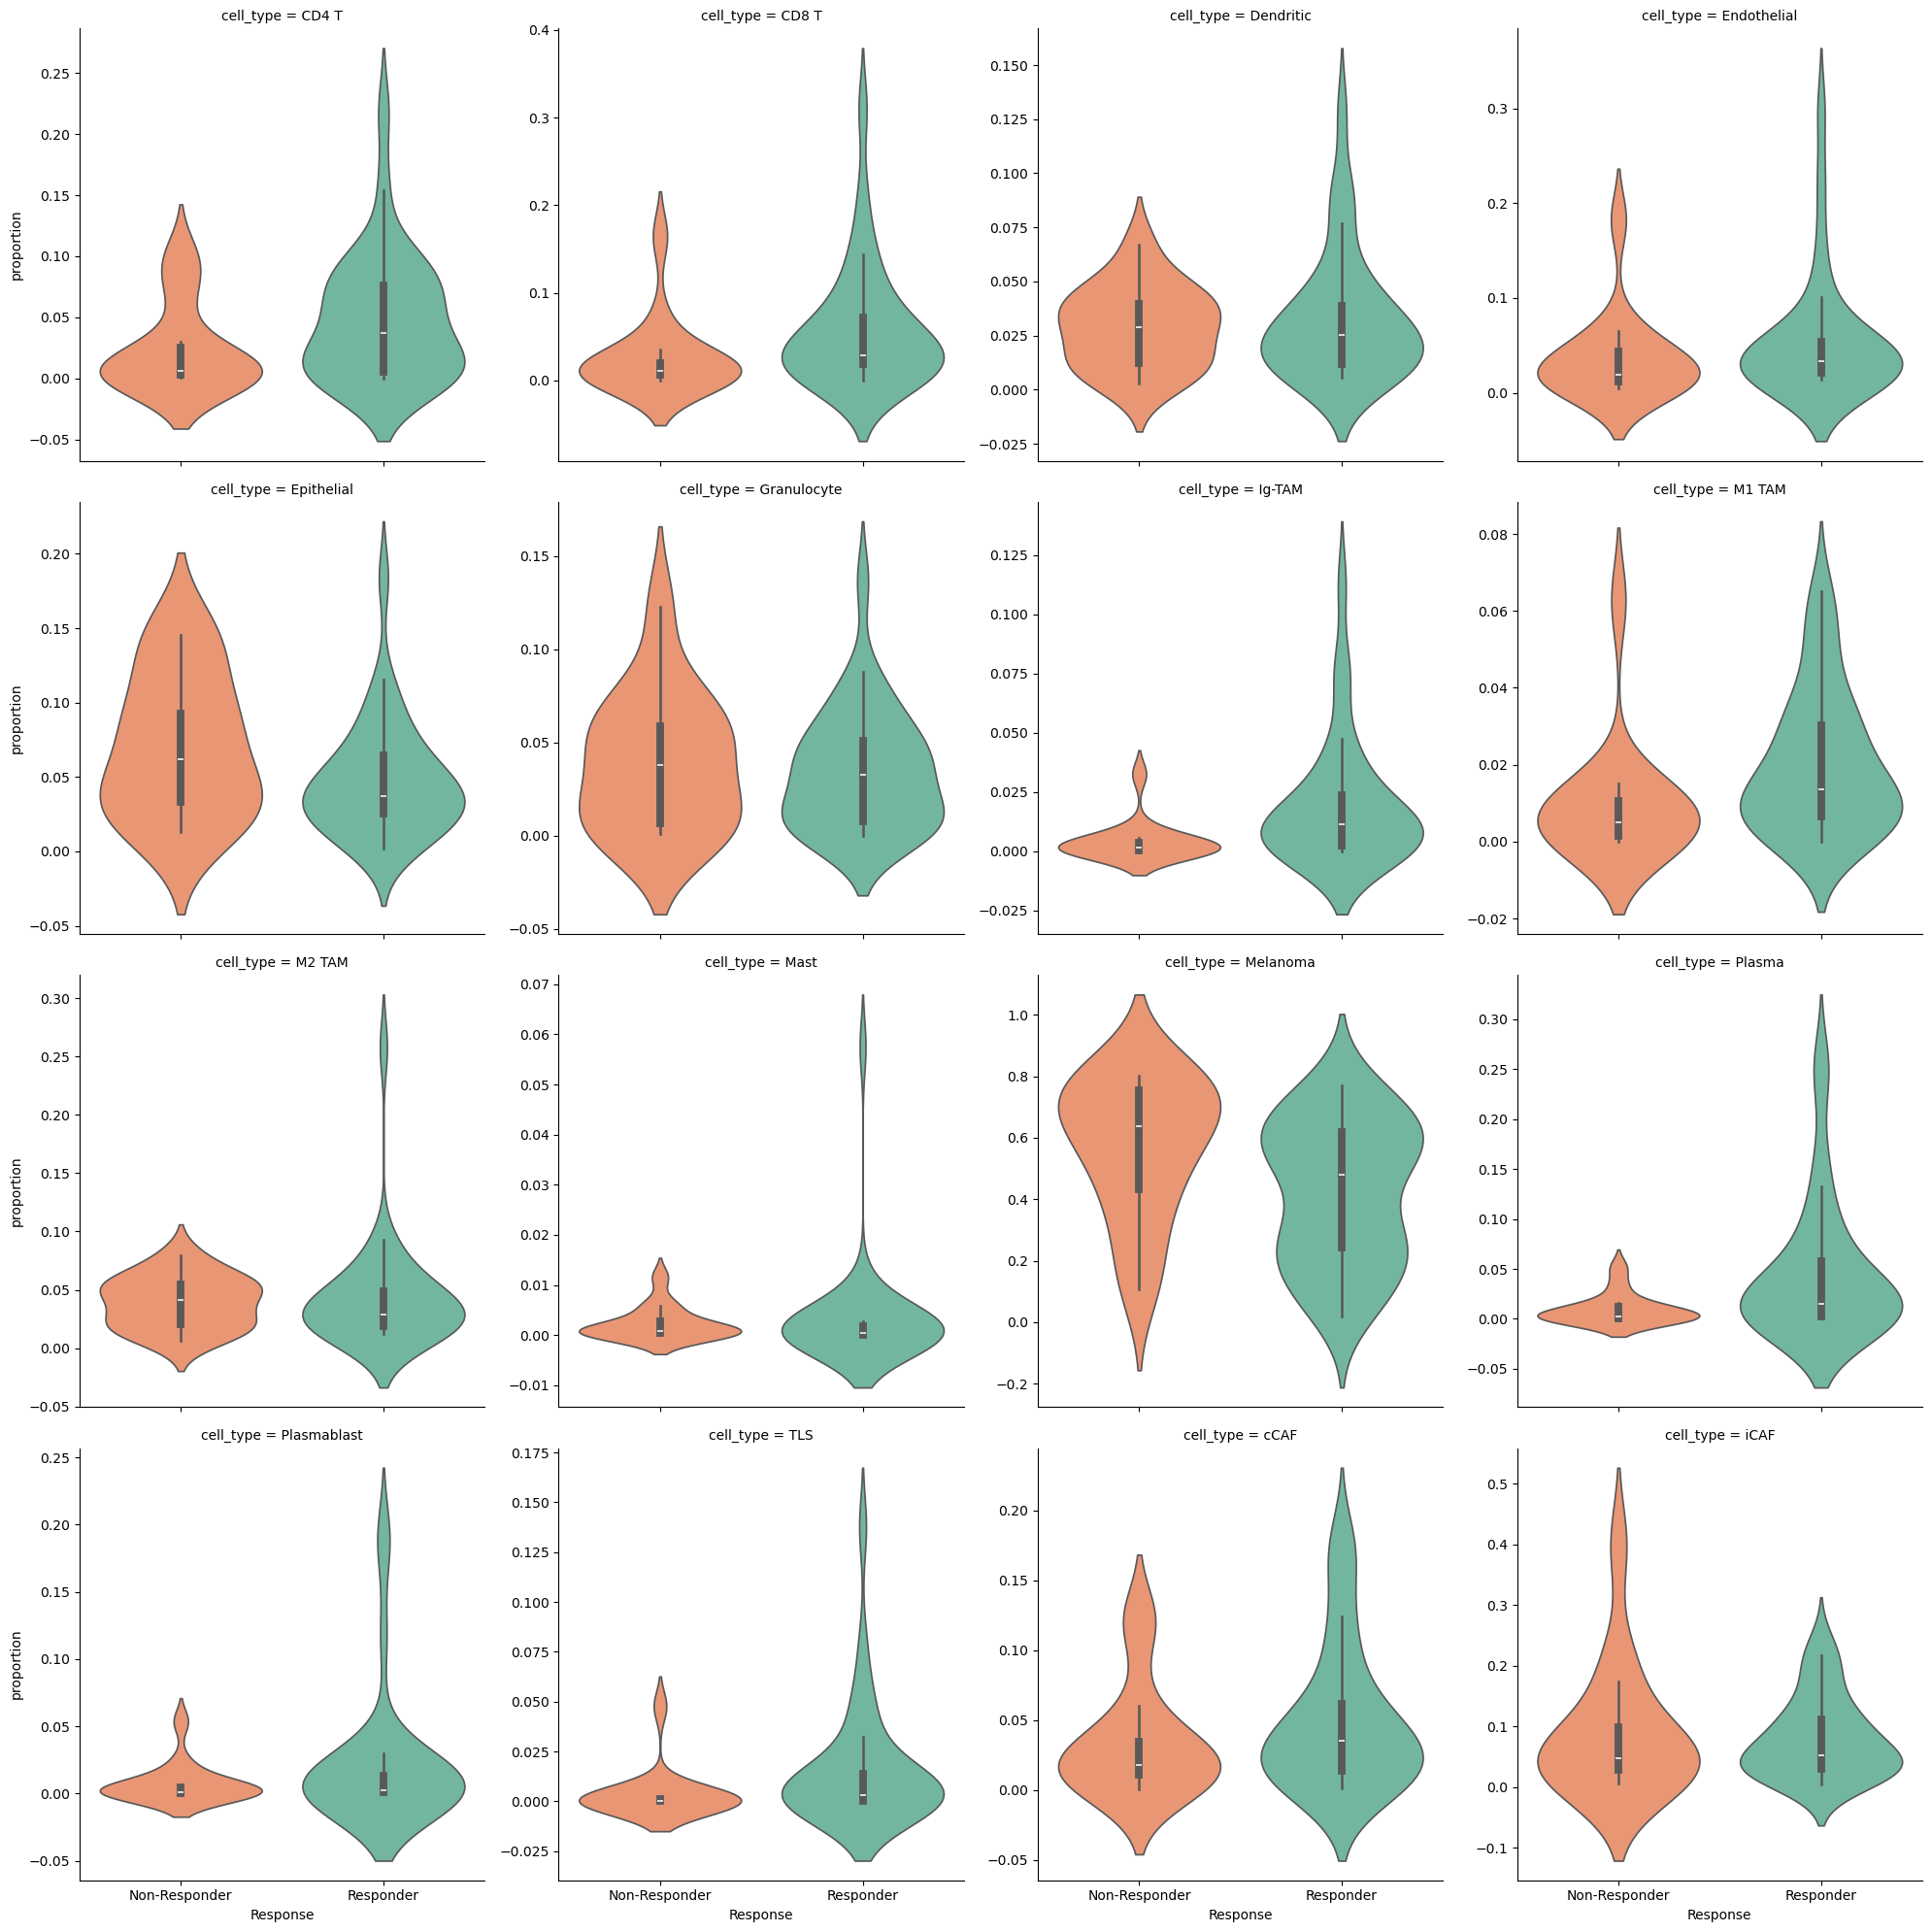

In [24]:
# violin plots
long_prop = proportions.join(meta[response_col]).reset_index()
long_prop = long_prop.melt(id_vars=[response_col, groupby], 
                           var_name="cell_type", value_name="proportion")

sns.catplot(
    data=long_prop,
    x=response_col,
    y="proportion",
    col="cell_type",
    kind="violin",
    inner="box",
    col_wrap=4,
    sharey=False,
    palette=response_palette
)
plt.tight_layout()
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Plasma_Non-Responder vs. Plasma_Responder: Custom statistical test, P_val:4.474e-02
Ig-TAM_Non-Responder vs. Ig-TAM_Responder: Custom statistical test, P_val:4.668e-02
Plasmablast_Non-Responder vs. Plasmablast_Responder: Custom statistical test, P_val:1.633e-01
TLS_Non-Responder vs. TLS_Responder: Custom statistical test, P_val:6.350e-02


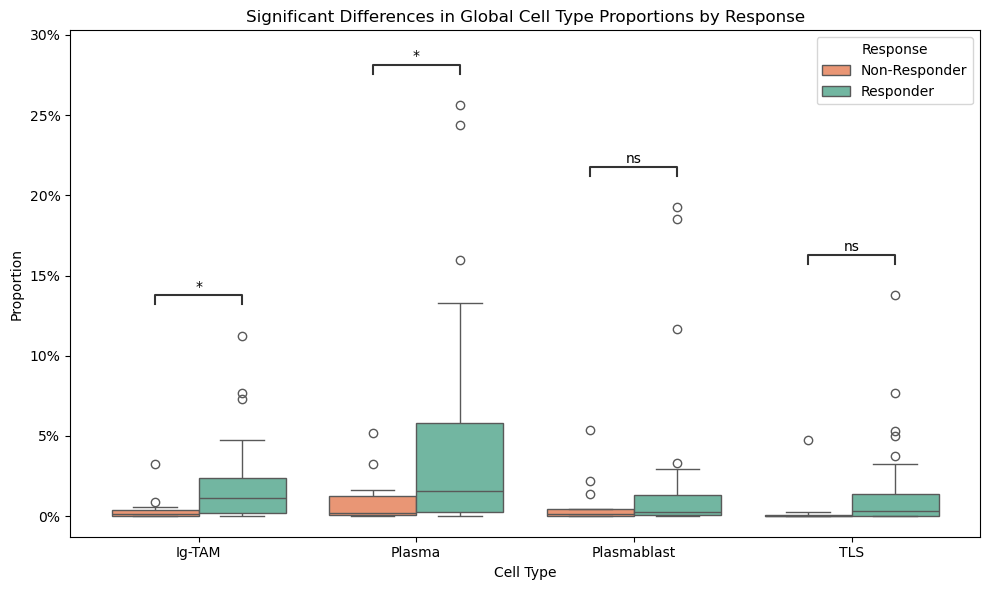

In [25]:
# box plots for significantly differential cell types
sig_terms = (
    tidy_df.query(f"term.str.contains('{response_col}')", engine="python")
    .query("sig != ''")   # keep only significant
    .loc[:, ['cell_type', 'fdr', 'sig']]
    .drop_duplicates('cell_type')
)
significant_CT = sig_terms['cell_type'].tolist()
subset = long_prop[long_prop['cell_type'].isin(significant_CT)]

pairs = [
    ((ct, "Non-Responder"), (ct, "Responder"))
    for ct in significant_CT
]

plt.figure(figsize=(10,6))
ax = sns.boxplot(
    data=subset, 
    x="cell_type", 
    y="proportion", 
    hue=response_col, 
    palette=response_palette
    )

annotator = Annotator(
    ax, 
    pairs, 
    data=subset,
    x="cell_type", 
    y="proportion", 
    hue=response_col
    )
annotator.configure(test=None, text_format='star', loc='inside')
annotator.set_pvalues(list(sig_terms['fdr']))  # pass FDR values in correct order
annotator.annotate()

ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1, decimals=0)) # convert y-axis scale to percentage

plt.ylabel("Proportion")
plt.xlabel("Cell Type")
#plt.xticks(rotation=45, ha="right")
plt.title("Significant Differences in Global Cell Type Proportions by Response")
plt.tight_layout()

<h1><b>Peritumour Analysis

In [26]:
results_df, tidy_df, proportions, meta, response_col, groupby, region_col = run_cell_prop(adata_peritumour, celltype_col='specific_cell_types')

/Users/nabilazulkapeli/Documents/Honours Thesis 2025/nabs_data/final_files/cell_type_proportions.py:51: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[celltype_col] = adata.obs[celltype_col].map(new_labels_map)
/Users/nabilazulkapeli/Documents/Honours Thesis 2025/nabs_data/final_files/cell_type_proportions.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby([groupby, celltype_col])
/opt/anaconda3/envs/ds_env/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/anaconda3/envs/ds_env/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2261: Converge

/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46233/1253738318.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(response_col)


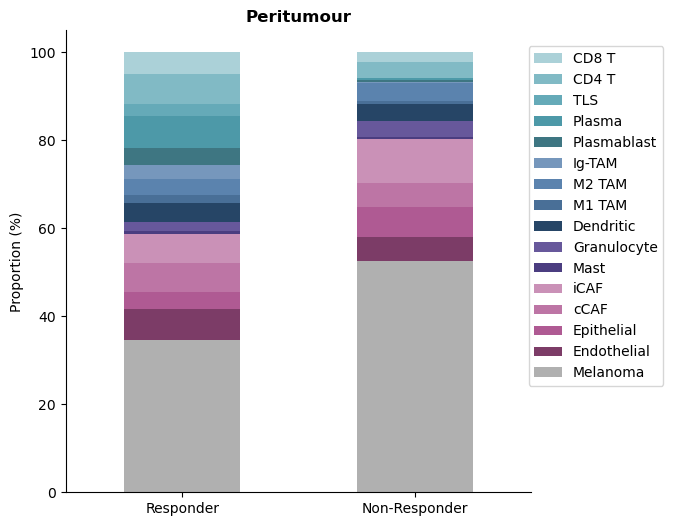

In [28]:
# stacked bar plot
# compute mean composition for responders and non-responders
composition = (
    proportions.join(meta[response_col])
    .groupby(response_col)
    .mean()
)
# rename and reorder categorical labels
composition = composition.reset_index()
composition = composition.set_index('Response')
composition = composition.reindex(['Responder', 'Non-Responder'])

# normalize so each bar adds up to 100%
composition = composition.div(composition.sum(axis=1), axis=0) * 100  # ensure percentages

composition = composition[new_labels_order]
ax = composition.plot(
    kind='bar',
    stacked=True,
    color=[new_labels_colors[c] for c in composition.columns],
    width=0.5,
    grid=False,
    figsize=(6,6),
)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, new_labels, loc='upper right', bbox_to_anchor=(1.3, .98), reverse=True)
plt.ylabel("Proportion (%)")
plt.xlabel("")
plt.title("Peritumour", weight='bold')
plt.tick_params(axis='x', labelrotation=0)
sns.despine()

/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46233/2554315159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_effect['beta_pct'] = response_effect['beta_prop'] * 100
/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46233/2554315159.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_effect['ci_low_pct'] = response_effect['ci_low_prop'] * 100
/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46233/2554315159.py:5: SettingWithCopyWarning: 
A value is tryi

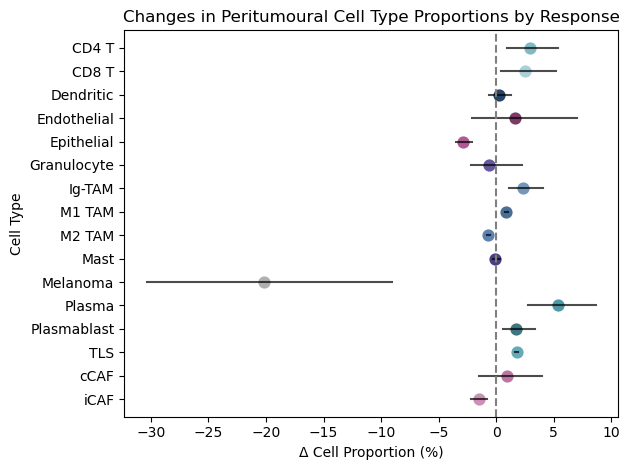

In [30]:
# forest plot
response_effect = tidy_df[tidy_df['term'].str.contains(response_col)]
response_effect['beta_pct'] = response_effect['beta_prop'] * 100
response_effect['ci_low_pct'] = response_effect['ci_low_prop'] * 100
response_effect['ci_high_pct'] = response_effect['ci_high_prop'] * 100

plt.Figure(figsize=(6,4))
ax = sns.pointplot(
    data=response_effect,
    y='cell_type',
    x='beta_pct',
    join=False,
    capsize=0.2,
    errorbar=None,
    palette=new_labels_colors
)
for i, row in response_effect.iterrows():
    plt.plot([row['ci_low_pct'], row['ci_high_pct']], [row['cell_type']]*2, 'k-', alpha=0.7)

plt.axvline(0, ls='--', c='gray')
plt.ylabel('Cell Type')
plt.xlabel('Δ Cell Proportion (%)')
plt.title('Changes in Peritumoural Cell Type Proportions by Response')
plt.tight_layout()
plt.show()

/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46233/4122211679.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


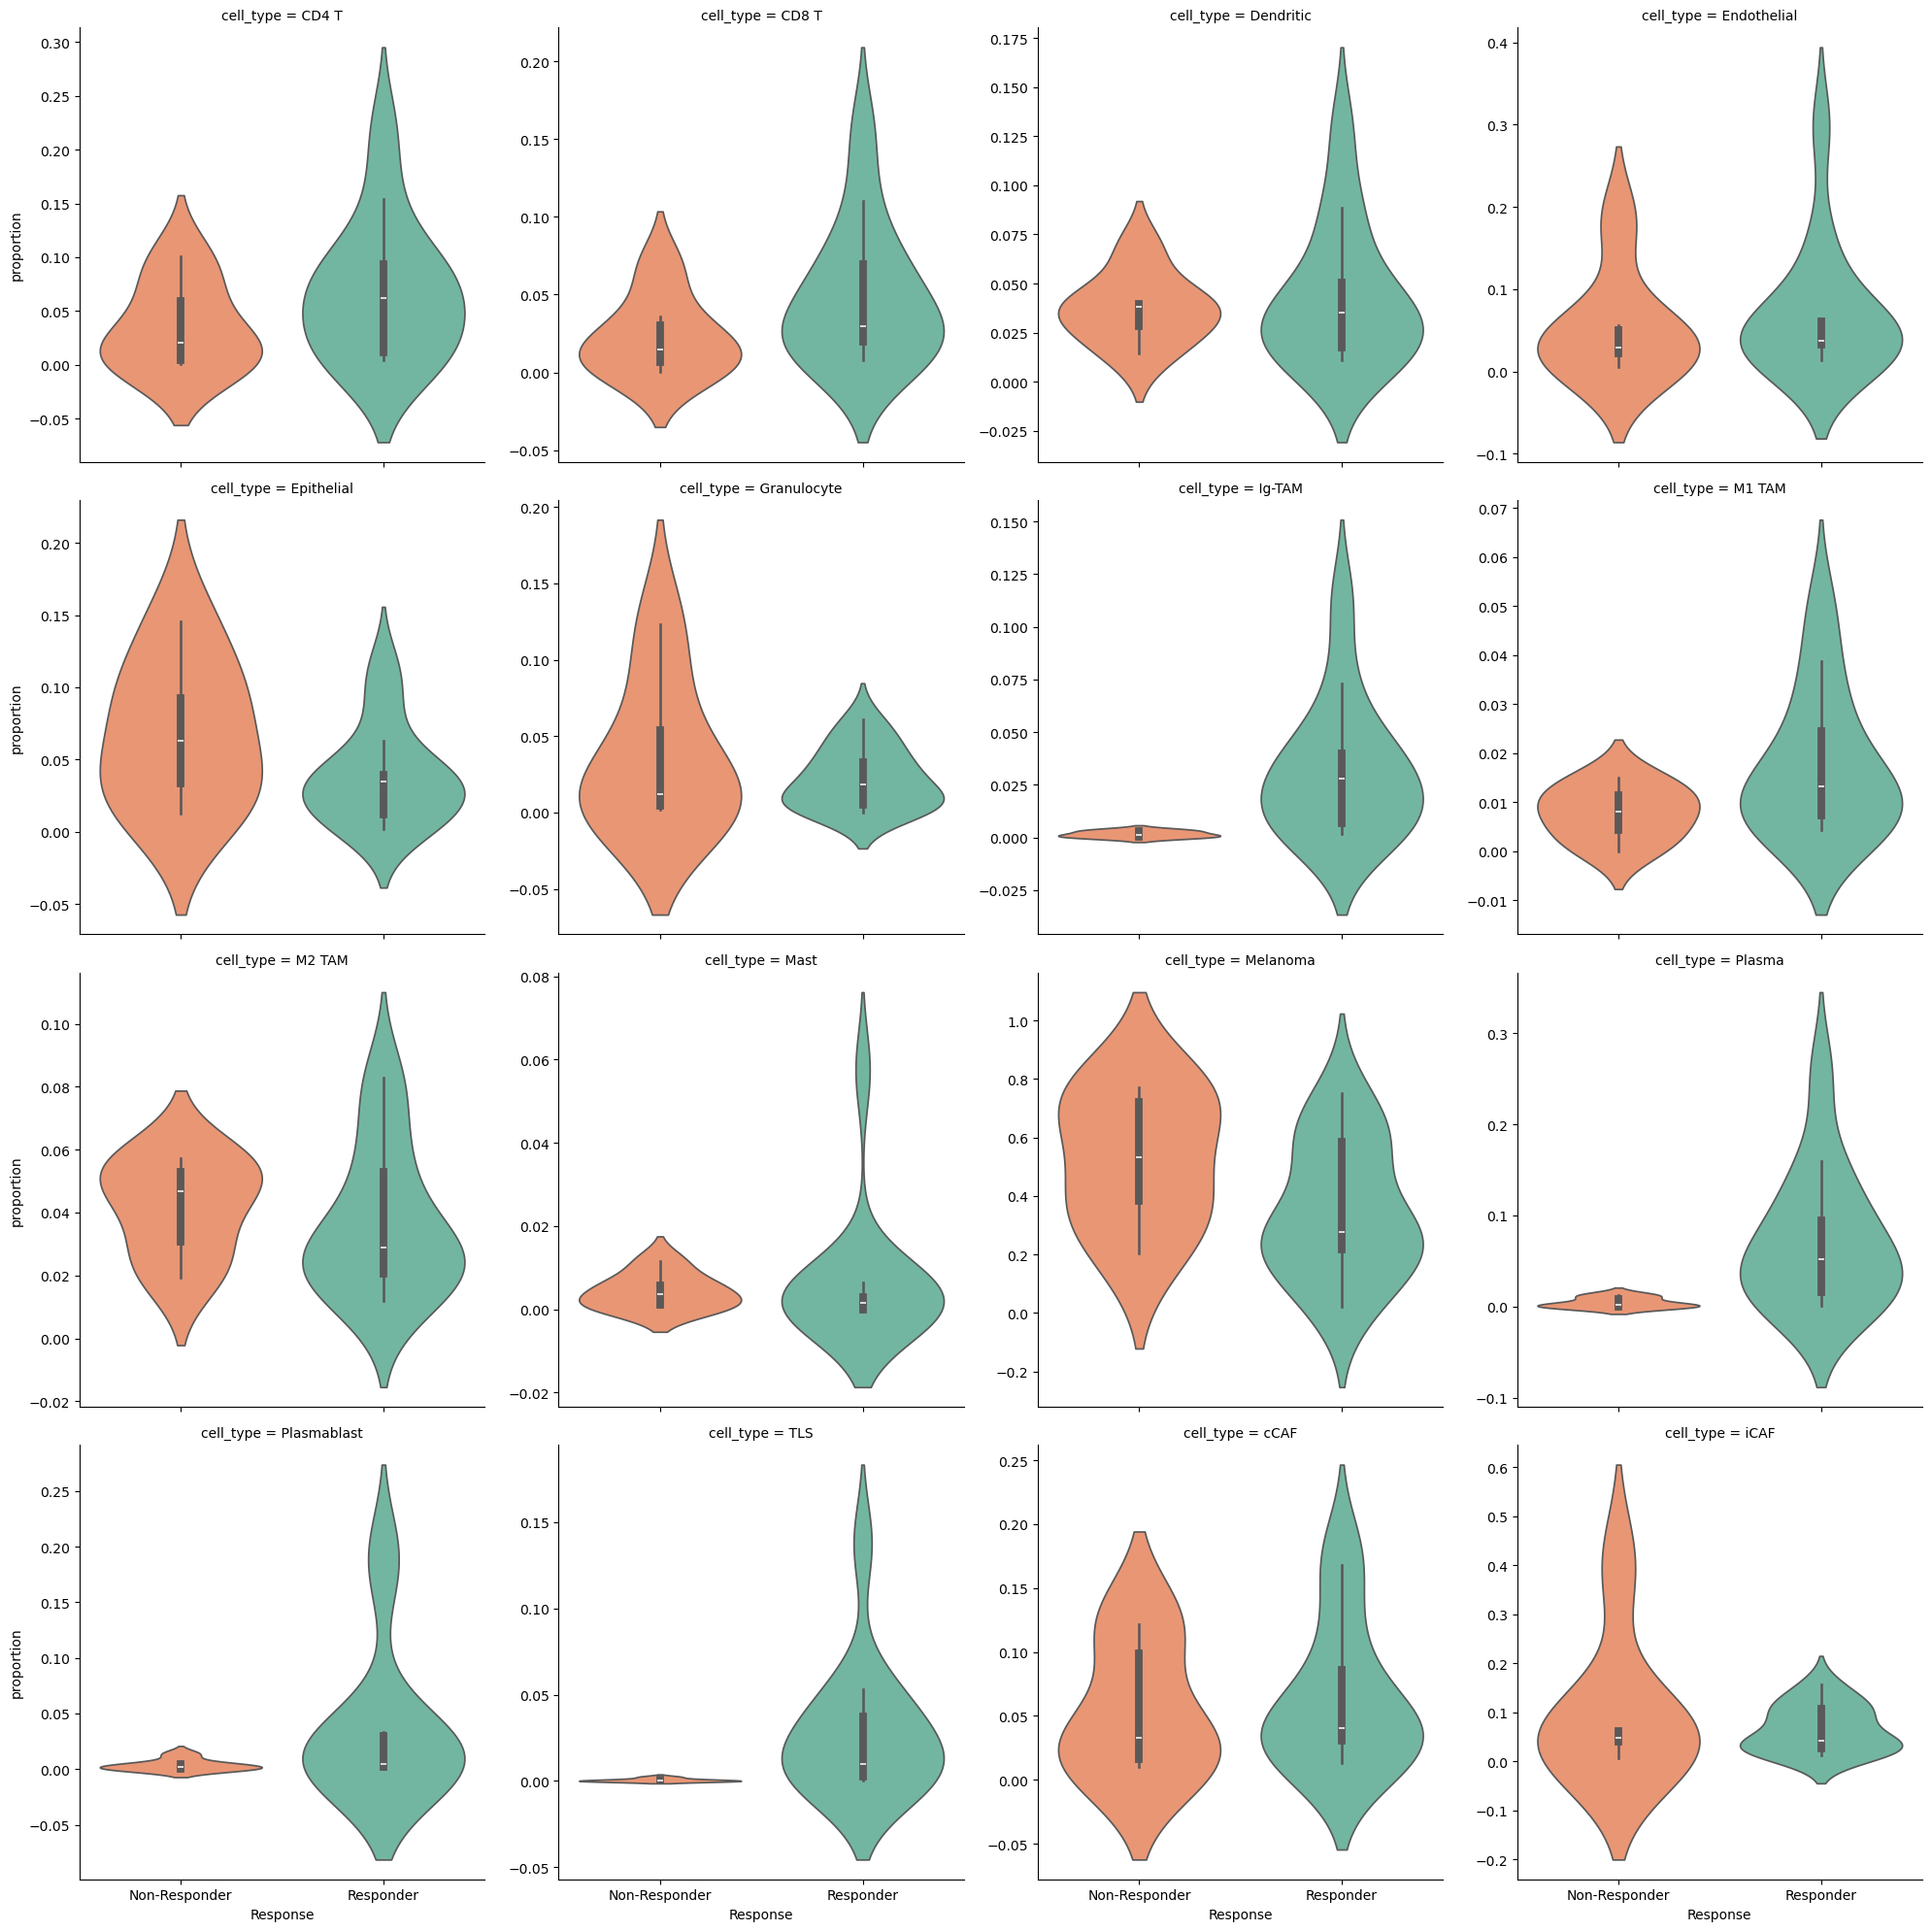

In [32]:
# violin plots
long_prop = proportions.join(meta[response_col]).reset_index()
long_prop = long_prop.melt(id_vars=[response_col, groupby], 
                           var_name="cell_type", value_name="proportion")
sns.catplot(
    data=long_prop,
    x=response_col,
    y="proportion",
    col="cell_type",
    kind="violin",
    inner="box",
    col_wrap=4,
    sharey=False,
    palette=response_palette
)
plt.tight_layout()
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TLS_Non-Responder vs. TLS_Responder: Custom statistical test, P_val:0.000e+00
iCAF_Non-Responder vs. iCAF_Responder: Custom statistical test, P_val:6.959e-05
Plasmablast_Non-Responder vs. Plasmablast_Responder: Custom statistical test, P_val:6.050e-04
CD8 T_Non-Responder vs. CD8 T_Responder: Custom statistical test, P_val:2.238e-02
CD4 T_Non-Responder vs. CD4 T_Responder: Custom statistical test, P_val:2.687e-03
Epithelial_Non-Responder vs. Epithelial_Responder: Custom statistical test, P_val:2.560e-10
Ig-TAM_Non-Responder vs. Ig-TAM_Responder: Custom statistical test, P_val:5.705e-07
M1 TAM_Non-Responder vs. M1 TAM_Responder: Custom statistical test, P_val:2.383e-50
M2 TAM_Non-Responder vs. M2 TAM_Responder: Custom statistical test, P_val:1.652e-20
Melanoma_Non-Responder vs. Melanoma_Responder: C

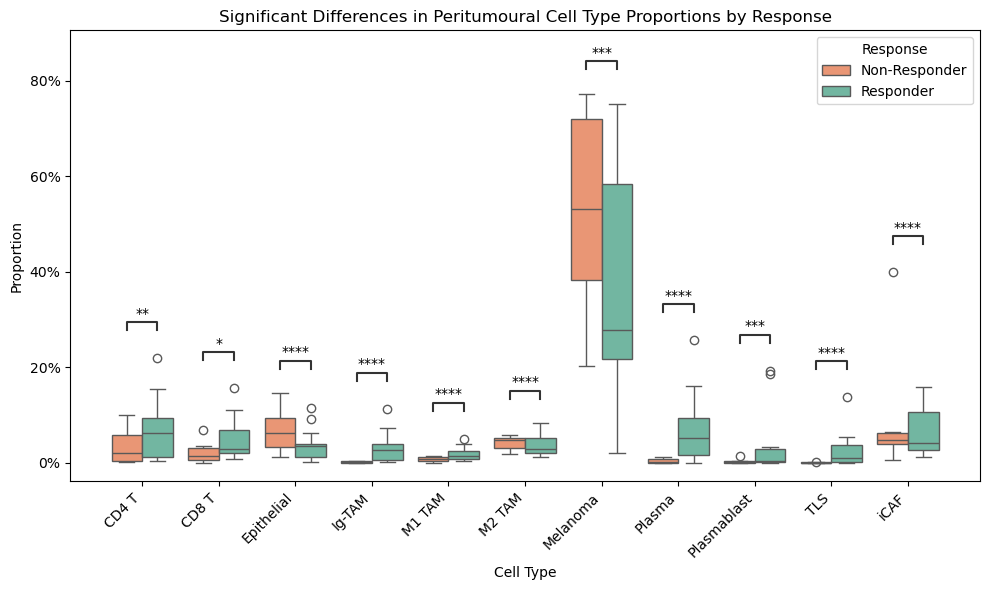

In [33]:
# box plots for significantly differential cell types
sig_terms = (
    tidy_df.query(f"term.str.contains('{response_col}')", engine="python")
    .query("sig != ''")   # keep only significant
    .loc[:, ['cell_type', 'fdr', 'sig']]
    .drop_duplicates('cell_type')
)
significant_CT = sig_terms['cell_type'].tolist()
subset = long_prop[long_prop['cell_type'].isin(significant_CT)]

pairs = [
    ((ct, "Non-Responder"), (ct, "Responder"))
    for ct in significant_CT
]

plt.figure(figsize=(10,6))
ax = sns.boxplot(
    data=subset, 
    x="cell_type", 
    y="proportion", 
    hue=response_col, 
    palette=response_palette
    )

annotator = Annotator(
    ax, 
    pairs, 
    data=subset,
    x="cell_type", 
    y="proportion", 
    hue=response_col
    )
annotator.configure(test=None, text_format='star', loc='inside')
annotator.set_pvalues(list(sig_terms['fdr']))  # pass FDR values in correct order
annotator.annotate()

ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1, decimals=0)) # convert y-axis scale to percentage

plt.ylabel("Proportion")
plt.xlabel("Cell Type")
plt.xticks(rotation=45, ha="right")
plt.title("Significant Differences in Peritumoural Cell Type Proportions by Response")
plt.tight_layout()

<h1><b>High Tumour Analysis

In [4]:
results_df, tidy_df, proportions, meta, response_col, groupby, region_col = run_cell_prop(adata_hightumour, celltype_col='specific_cell_types')

/Users/nabilazulkapeli/Documents/Honours Thesis 2025/nabs_data/final_files/cell_type_proportions.py:51: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[celltype_col] = adata.obs[celltype_col].map(new_labels_map)
/Users/nabilazulkapeli/Documents/Honours Thesis 2025/nabs_data/final_files/cell_type_proportions.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby([groupby, celltype_col])
/opt/anaconda3/envs/ds_env/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/anaconda3/envs/ds_env/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2261: Converge

/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46233/2213144437.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(response_col)


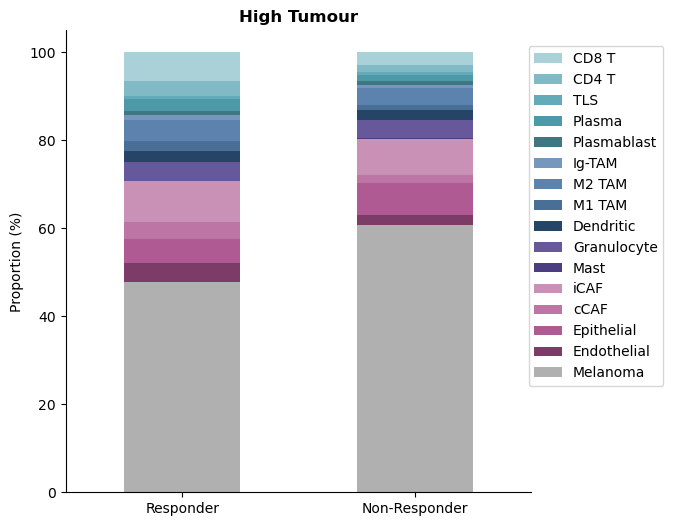

In [8]:
# stacked bar plot
# compute mean composition for responders and non-responders
composition = (
    proportions.join(meta[response_col])
    .groupby(response_col)
    .mean()
)
# rename and reorder categorical labels
composition = composition.reset_index()
composition = composition.set_index('Response')
composition = composition.reindex(['Responder', 'Non-Responder'])

# normalize so each bar adds up to 100%
composition = composition.div(composition.sum(axis=1), axis=0) * 100  # ensure percentages

composition = composition[new_labels_order]
ax = composition.plot(
    kind='bar',
    stacked=True,
    color=[new_labels_colors[c] for c in composition.columns],
    width=0.5,
    grid=False,
    figsize=(6,6),
)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, new_labels, loc='upper right', bbox_to_anchor=(1.3, .98), reverse=True)
plt.ylabel("Proportion (%)")
plt.xlabel("")
plt.title("High Tumour", weight='bold')
plt.tick_params(axis='x', labelrotation=0)
sns.despine()

/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46233/4217711942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_effect['beta_pct'] = response_effect['beta_prop'] * 100
/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46233/4217711942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_effect['ci_low_pct'] = response_effect['ci_low_prop'] * 100
/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46233/4217711942.py:5: SettingWithCopyWarning: 
A value is tryi

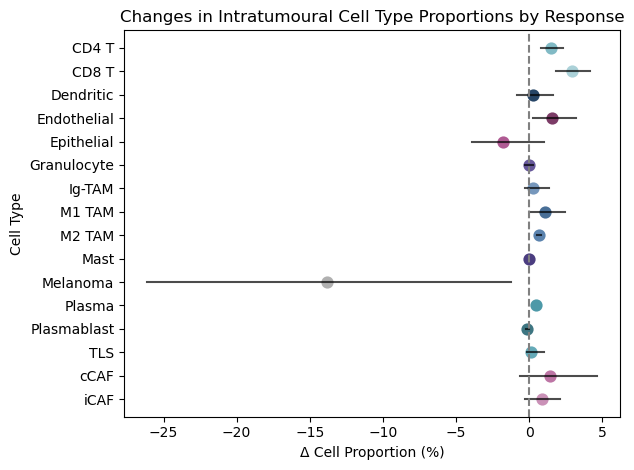

In [9]:
# forest plot
response_effect = tidy_df[tidy_df['term'].str.contains(response_col)]
response_effect['beta_pct'] = response_effect['beta_prop'] * 100
response_effect['ci_low_pct'] = response_effect['ci_low_prop'] * 100
response_effect['ci_high_pct'] = response_effect['ci_high_prop'] * 100

plt.Figure(figsize=(6,4))
ax = sns.pointplot(
    data=response_effect,
    y='cell_type',
    x='beta_pct',
    join=False,
    capsize=0.2,
    errorbar=None,
    palette=new_labels_colors
)
for i, row in response_effect.iterrows():
    plt.plot([row['ci_low_pct'], row['ci_high_pct']], [row['cell_type']]*2, 'k-', alpha=0.7)

plt.axvline(0, ls='--', c='gray')
plt.ylabel('Cell Type')
plt.xlabel('Δ Cell Proportion (%)')
plt.title('Changes in Intratumoural Cell Type Proportions by Response')
plt.tight_layout()
plt.show()

/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46233/2670871168.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


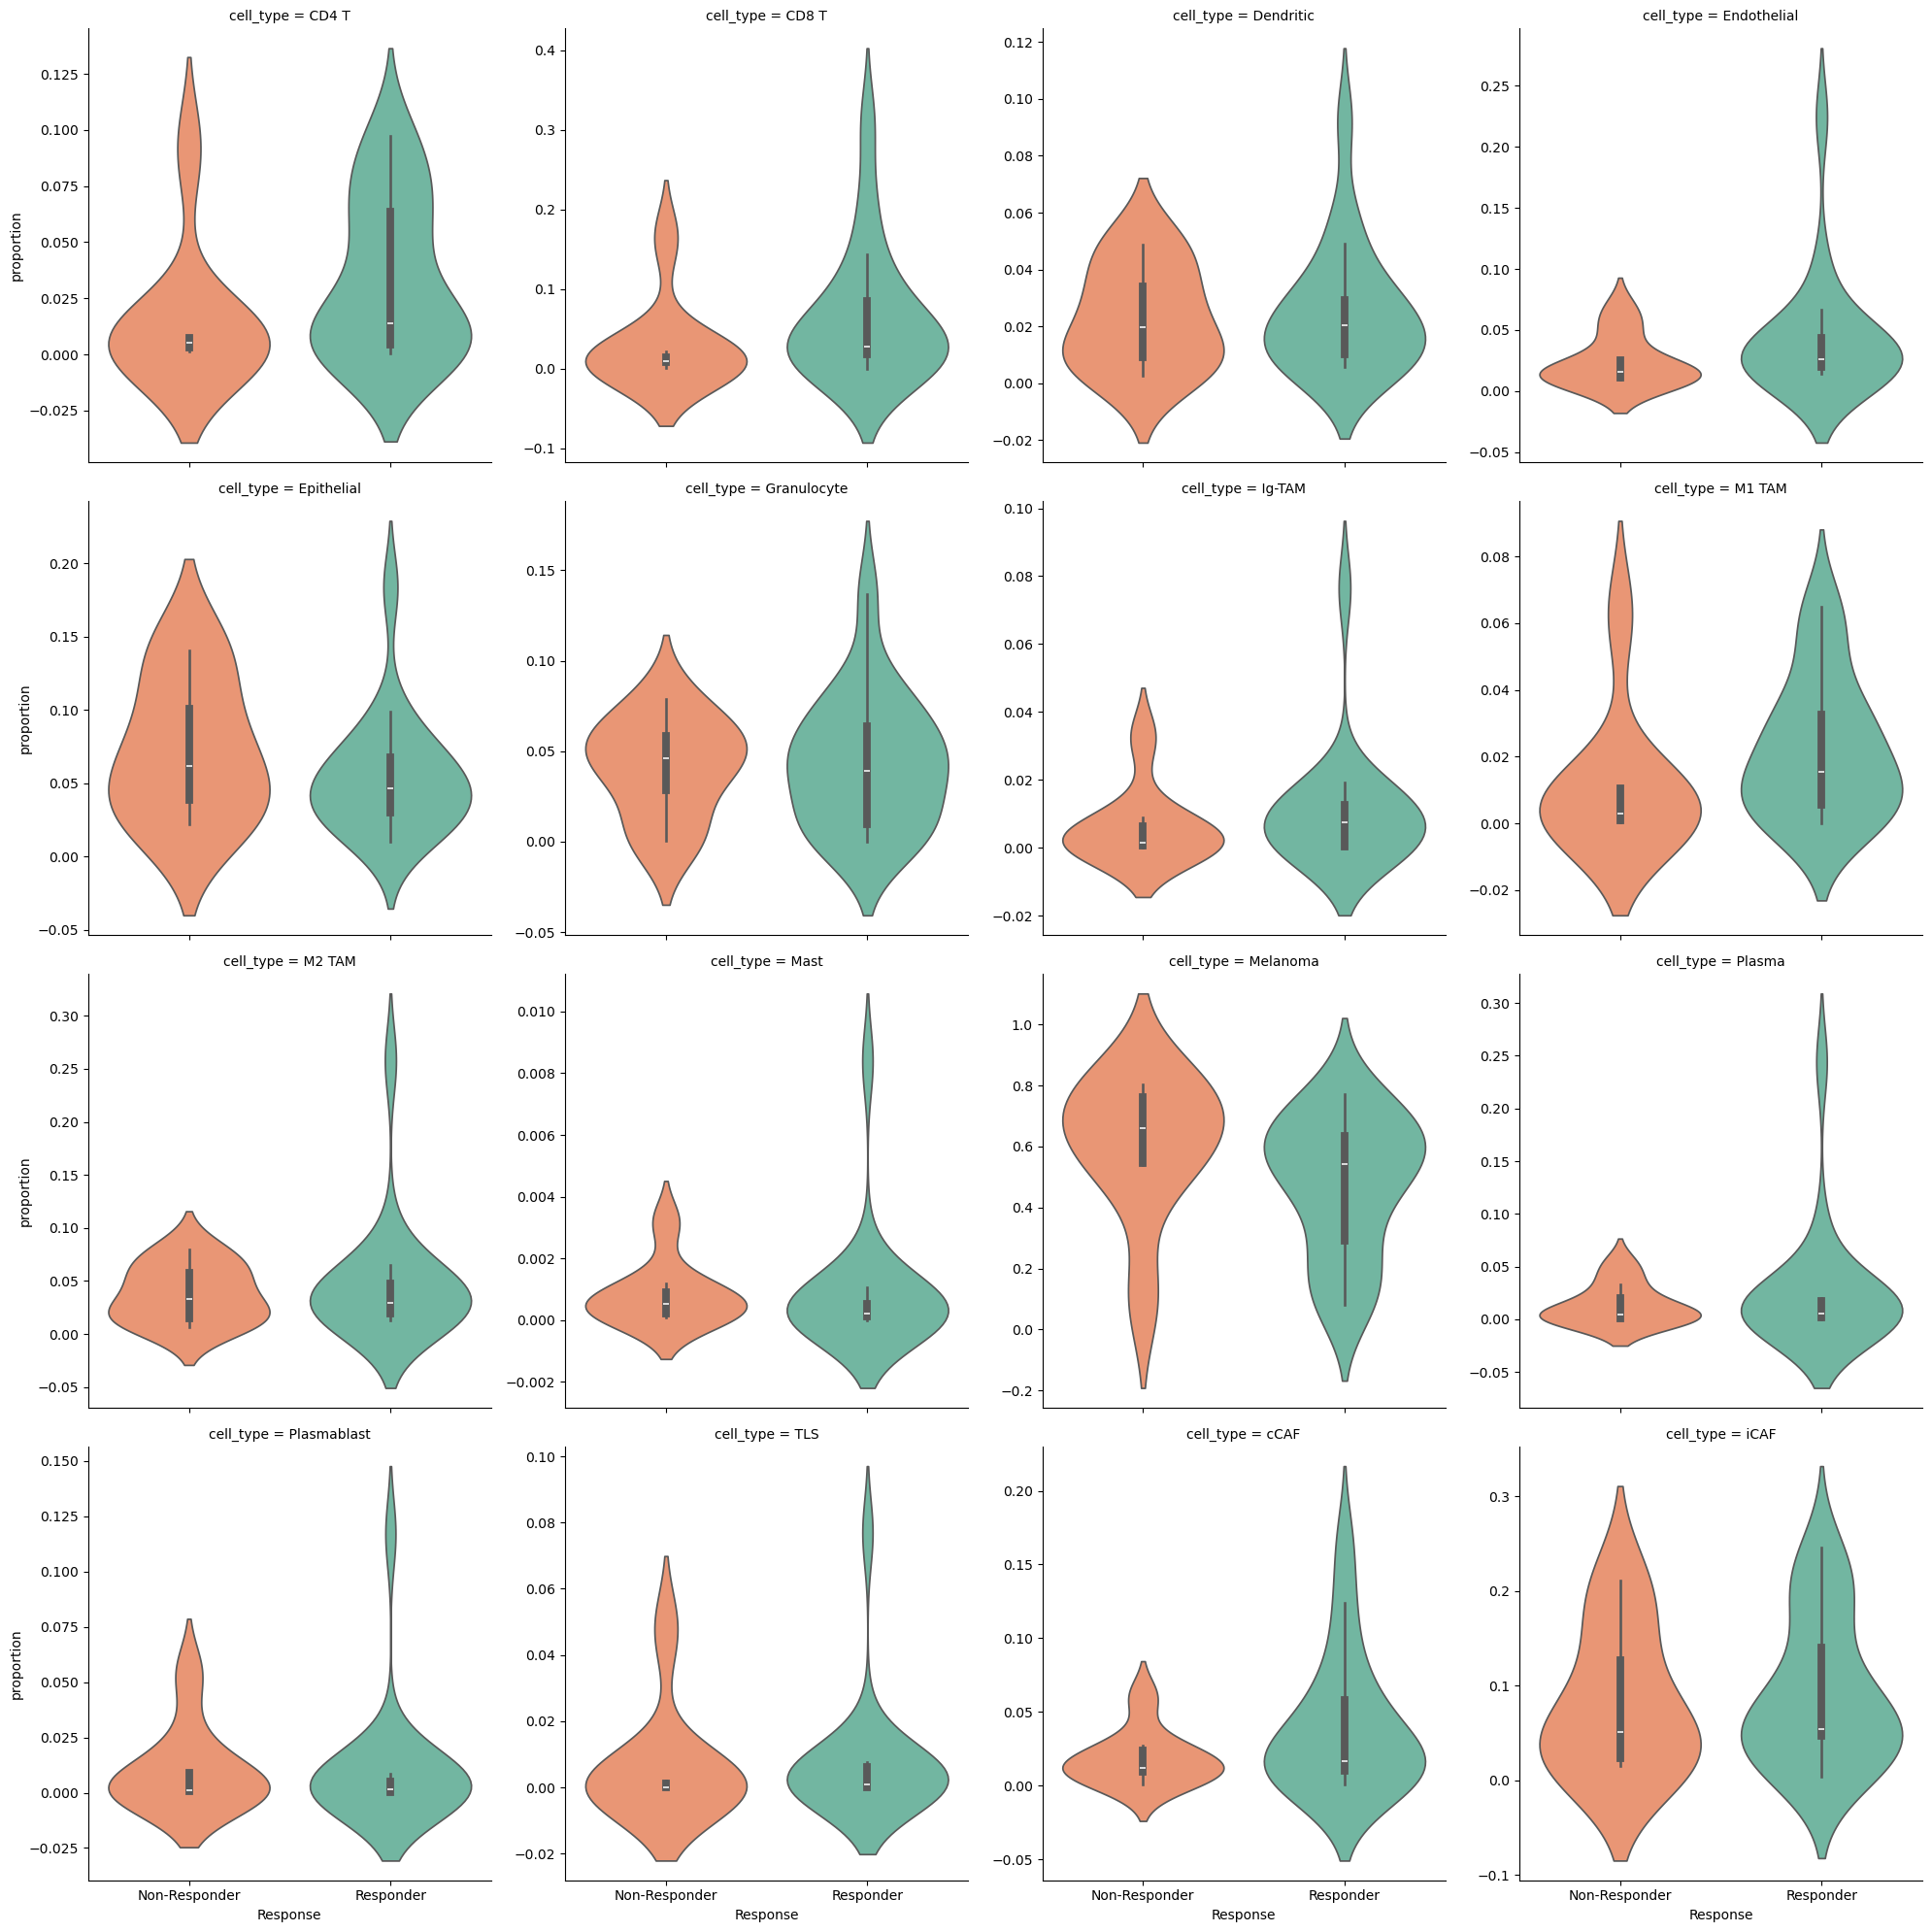

In [12]:
# violin plots
long_prop = proportions.join(meta[response_col]).reset_index()
long_prop = long_prop.melt(id_vars=[response_col, groupby], 
                           var_name="cell_type", value_name="proportion")

sns.catplot(
    data=long_prop,
    x=response_col,
    y="proportion",
    col="cell_type",
    kind="violin",
    inner="box",
    col_wrap=4,
    sharey=False,
    palette=response_palette
)
plt.tight_layout()
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Plasmablast_Non-Responder vs. Plasmablast_Responder: Custom statistical test, P_val:1.399e-02
CD8 T_Non-Responder vs. CD8 T_Responder: Custom statistical test, P_val:9.268e-09
CD4 T_Non-Responder vs. CD4 T_Responder: Custom statistical test, P_val:6.316e-06
Endothelial_Non-Responder vs. Endothelial_Responder: Custom statistical test, P_val:4.187e-02
M1 TAM_Non-Responder vs. M1 TAM_Responder: Custom statistical test, P_val:5.584e-02
M2 TAM_Non-Responder vs. M2 TAM_Responder: Custom statistical test, P_val:4.365e-21
Mast_Non-Responder vs. Mast_Responder: Custom statistical test, P_val:0.000e+00
Melanoma_Non-Responder vs. Melanoma_Responder: Custom statistical test, P_val:5.584e-02
Plasma_Non-Responder vs. Plasma_Responder: Custom statistical test, P_val:0.000e+00


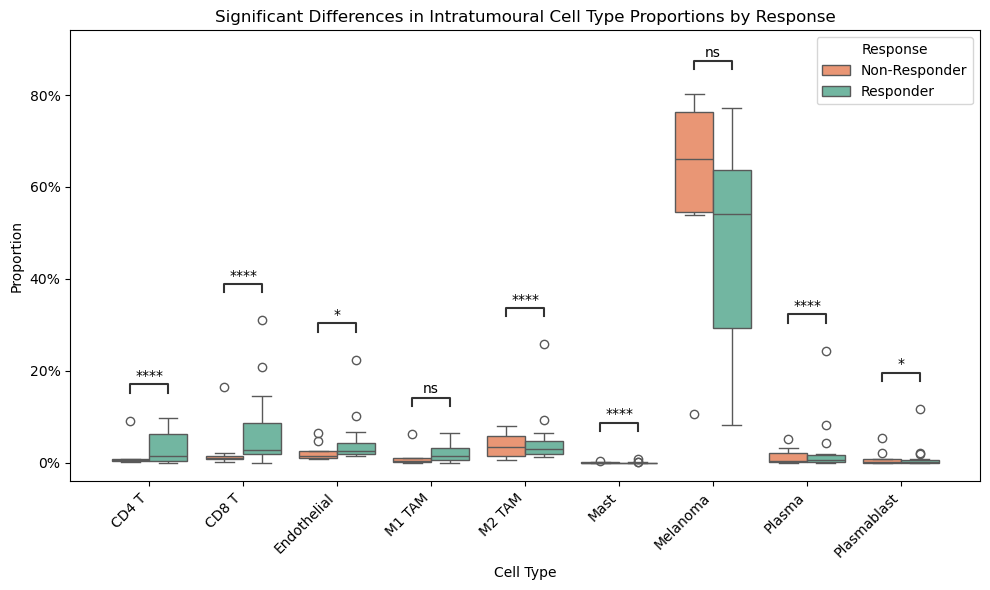

In [13]:
# box plots for significantly differential cell types
sig_terms = (
    tidy_df.query(f"term.str.contains('{response_col}')", engine="python")
    .query("sig != ''")   # keep only significant
    .loc[:, ['cell_type', 'fdr', 'sig']]
    .drop_duplicates('cell_type')
)
significant_CT = sig_terms['cell_type'].tolist()
subset = long_prop[long_prop['cell_type'].isin(significant_CT)]

pairs = [
    ((ct, "Non-Responder"), (ct, "Responder"))
    for ct in significant_CT
]

plt.figure(figsize=(10,6))
ax = sns.boxplot(
    data=subset, 
    x="cell_type", 
    y="proportion", 
    hue=response_col, 
    palette=response_palette
    )

annotator = Annotator(
    ax, 
    pairs, 
    data=subset,
    x="cell_type", 
    y="proportion", 
    hue=response_col
    )
annotator.configure(test=None, text_format='star', loc='inside')
annotator.set_pvalues(list(sig_terms['fdr']))  # pass FDR values in correct order
annotator.annotate()

ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1, decimals=0)) # convert y-axis scale to percentage

plt.ylabel("Proportion")
plt.xlabel("Cell Type")
plt.xticks(rotation=45, ha="right")
plt.title("Significant Differences in Intratumoural Cell Type Proportions by Response")
plt.tight_layout()